In [81]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
import networkx as nx

In [82]:
co_offending_table = pd.read_csv('./Cooffending.csv')
co_offending_table.drop_duplicates(inplace=True)
co_offending_table.sort_values(by='NoUnique', inplace=True)
def to_int(x):
    if x == ' ':
        return 0
    else:
        return int(x)
co_offending_table.NCD1 = co_offending_table.NCD1.apply(to_int)
co_offending_table.NCD1 = co_offending_table.NCD1.astype(int)

In [83]:
crime_labels = pd.read_csv('./crime_type_mapping.csv')

In [84]:
co_offending_table_with_crime_labels = pd.merge(co_offending_table, crime_labels, left_on='NCD1', 
                                                right_on='crime_code', how='left')

In [89]:
co_offending_table_with_crime_labels['crime'] = 1

In [90]:
co_offending_table_with_crime_labels['crime_count'] = co_offending_table_with_crime_labels.groupby('NoUnique')['crime'].transform('sum')

In [85]:
co_offending_table_with_crime_labels['drug_crime_count'] = co_offending_table_with_crime_labels.groupby('NoUnique')['drug_crime'].transform('sum')

In [86]:
co_offending_table_with_crime_labels['drug_usage_count'] = co_offending_table_with_crime_labels.groupby('NoUnique')['drug_usage'].transform('sum')

In [87]:
co_offending_table_with_crime_labels['drug_trafficking_count'] = co_offending_table_with_crime_labels.groupby('NoUnique')['drug_trafficking'].transform('sum')

In [91]:
co_offending_table_with_crime_labels['other_crime_count'] = co_offending_table_with_crime_labels['crime_count'] - co_offending_table_with_crime_labels['drug_crime_count'] 

In [111]:
co_offending_table_with_crime_labels['percent_traffic'] = co_offending_table_with_crime_labels['drug_trafficking_count']/co_offending_table_with_crime_labels['crime_count'] 

In [113]:
co_offending_table_with_crime_labels['percent_usage'] = co_offending_table_with_crime_labels['drug_usage_count']/co_offending_table_with_crime_labels['crime_count'] 

In [114]:
co_offending_table_with_crime_labels['percent_other'] = co_offending_table_with_crime_labels['other_crime_count']/co_offending_table_with_crime_labels['crime_count'] 

In [115]:
drug_related = co_offending_table_with_crime_labels[co_offending_table_with_crime_labels.drug_crime > 0]


In [244]:
co_offending_table_with_crime_labels[co_offending_table_with_crime_labels.NoUnique == 
                                     36581][['text_description', 'dateInf']]


,text_description,dateInf
32309,METHAMPHETAMINES TRAFIC,20090528
32310,AUTRE SUBSTANCE POS TRAF.,20080424
32311,COCAINE TRAFIC,20061025
32312,INFRACTION CAUTIONNEMENT,20061226
32313,AUTRE SUBSTANCE TRAFIC,20060922
32314,AUTRE SUBSTANCE TRAFIC,20090720
32315,CANNABIS TRAFIC,20060613
32316,COCAINE TRAFIC,20060727
32317,COCAINE TRAFIC,20060817
32318,COCAINE TRAFIC,20061006


In [100]:
drug_crime_graph = nx.Graph()

for crime_seq in drug_related.SeqE:
    
    

,NoUnique,Naissance,SEXE,SeqE,dateInf,NCD1,NCD2,NCD3,NCD4,MUN,...,group_crime,drug_crime,drug_usage,drug_trafficking,drug_crime_count,drug_usage_count,drug_trafficking_count,crime,crime_count,other_crime_count
888,1152,1906,M,1582337,20050106,42401,44402,,,64008,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,1,0.0
1327,1546,1907,M,501266,20061009,4130,,,,66023,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1,1,0.0
1328,1547,1907,M,501266,20061009,4130,,,,66023,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1,1,0.0
3647,3722,1910,F,778213,20070410,4530,,,,66023,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0.0
4007,4083,1911,M,22740,20090823,4140,,,,66097,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1,1,0.0
4303,4762,1920,M,346859,20041007,42401,4140,44402,,52040,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,2,1.0
4617,5275,1922,F,1008658,20090224,4130,,,,81017,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1,1,0.0
4866,5722,1923,M,383353,20041023,4130,4140,,,76052,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1,1,0.0
4877,5735,1923,M,125562,20060617,4140,,,,70052,...,1.0,1.0,1.0,0.0,3.0,2.0,1.0,1,10,7.0
4880,5735,1923,M,128530,20080416,4220,4230,4240,,70052,...,1.0,1.0,0.0,1.0,3.0,2.0,1.0,1,10,7.0


In [101]:
crime_labels[crime_labels.crime_code == 3375]

,crime_code,text_description,criminology_category,group_crime,drug_crime,drug_usage,drug_trafficking
75,3375,POSSESSION D''ARMES,3,1,0,0,0


In [29]:
drug_crimes = co_offending_table_with_crime_labels.drug_crime == 1.0
co_offending_table_drugs_only = co_offending_table_with_crime_labels[drug_crimes]

In [37]:
co_offender_graph_drugs_only = nx.Graph()
i = 1
for crime_event in np.unique(co_offending_table_drugs_only.SeqE.values):
    if i % 10000 == 0:
        print(i)
    offenders_arrested_together = co_offending_table_drugs_only[co_offending_table_drugs_only.SeqE == crime_event]['NoUnique'].values 
    for offender1 in offenders_arrested_together:
        for offender2 in offenders_arrested_together:
            if offender1 != offender2:
                # so we get only one edge without any weight
                co_offender_graph_drugs_only.add_edge(offender1, offender2)
    i+=1

10000
20000
30000
40000
50000
60000
70000
80000


In [40]:
largest_component_graph = max(nx.connected_component_subgraphs(co_offender_graph_drugs_only), key=len)


In [42]:
len(largest_component_graph.nodes())

188

In [185]:
nodes = largest_component_graph.nodes()

In [245]:
colors = [co_offending_table_with_crime_labels[co_offending_table_with_crime_labels.NoUnique == i]['percent_traffic'].values[0] for i in nodes]

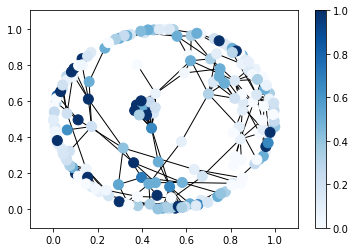

In [246]:
pos = nx.spring_layout(largest_component_graph)
sm = nx.draw_networkx_nodes(largest_component_graph, pos, nodelist=nodes, node_color=colors, cmap=plt.cm.Blues, node_size=100)
nx.draw_networkx_edges(largest_component_graph, pos, nodelist=nodes, node_color=colors, cmap=plt.cm.Blues)
plt.colorbar(sm)
#nx.draw(largest_component_graph, nodelist=nodes, node_color=colors)
plt.show()